# This file contains prototype of plant growth controlling system
Aplication relies on [OpenCv](https://opencv.org/) library, and aims to read basic information about growth of a plant, from recording of it.

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

```imread``` reads image from drive 
```resize``` scales it down to simplyfy later steps, this step will be skipped in the final product

In [2]:
img = cv2.imread('flower_image.jfif')
img = cv2.resize(img,(0, 0), fx=0.4, fy=0.4)


Shape field describes size of the image and amount of bytes reseved by one pixel  

In [3]:
height, width, _ = img.shape
print(img.shape)


(432, 768, 3)


## Filter Green
Checks if given RGB color is green.

First HSV value of given color is computed, than this value is check ageins definition of green color/ 

In [4]:
def  FilterGreen(color):
    
    r_c = color[2] / 255
    g_c = color[1] / 255
    b_c = color[0] / 255

    c_max = max(r_c, g_c) 
    c_max = max(c_max, b_c)

    c_min = min(r_c,g_c)
    c_min = min(c_min,b_c)

    delta = c_max - c_min

    v = c_max

    if v < 0.1: 
        return False

    
    s = 0
    if c_max != 0:
        s = delta / c_max

    if s < 0.1:
        return False

    h = 0.
    if c_max == r_c:

       h =  60 * (((g_c - b_c) / delta) % 6) 
    
    elif c_max == g_c:
    
       h =  60 * (((b_c - r_c) / delta) + 2)  
    
    elif c_max == b_c:
    
       h =  60 * (((r_c - g_c) / delta) + 4)
 

    if(h < 90 or h > 152): return False
    return True



Fillter all green pixels

In [5]:
gray_green_img = np.zeros(img.shape,np.uint8)
gray_green_img.fill(0)

for i in range(height):
    for j in range(width):
        if FilterGreen(img[i,j]):
            gray_green_img[i,j] = img[i,j]
           


Applay grid to filtered image 


In [6]:
no_x_cells = 50
no_y_cells = 50

cell_x_size = width // no_x_cells
cell_y_size = height // no_y_cells

if cell_x_size * no_x_cells != width : cell_x_size += 1 
if cell_y_size * no_y_cells != width : cell_y_size += 1 


color = (255, 0, 0)

thickness = 1

grid_image = gray_green_img.copy()


for x in range(no_x_cells):

    cv2.line(grid_image,
    (x * cell_x_size, 0),
    (x * cell_x_size, height), color, thickness)


for y in range(no_y_cells ):

    cv2.line(grid_image, 
    (0, y * cell_y_size),
    (width, y * cell_y_size), color, thickness)


In [7]:
activation_grid = np.zeros((no_x_cells , no_y_cells ))
print(activation_grid.shape)

(50, 50)


## Sum content of each cell 

In [8]:

for i in range(height):
    for j in range(width):
        activation_grid[i // cell_y_size, 
        j // cell_x_size] += gray_green_img[i,j][2]
    

## Normalize values acorfing to the biggest one  

In [9]:
max_value = np.max(activation_grid)

activation_grid = np.divide(activation_grid , max_value)

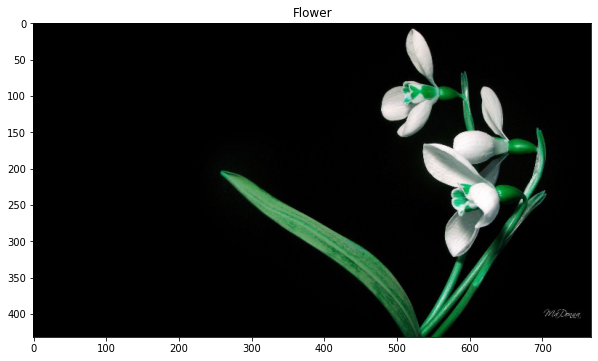

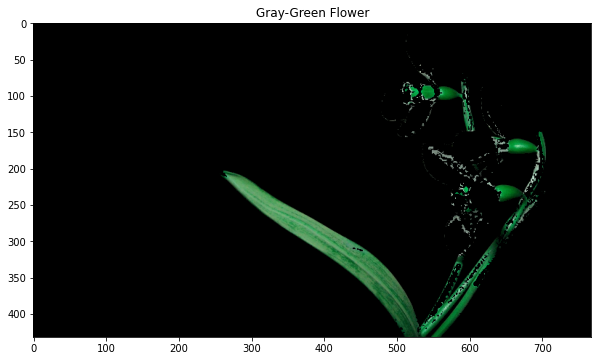

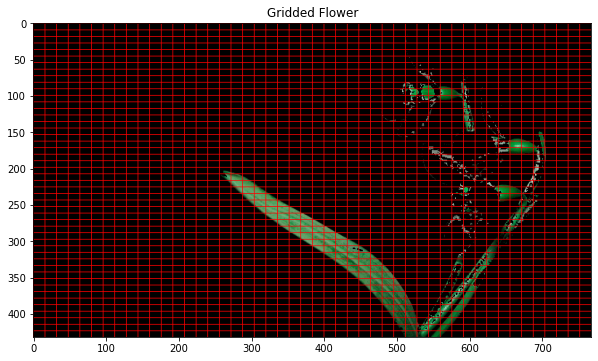

C:\Users\piotr\AppData\Local\Temp/ipykernel_17704/2791064321.py:45: RuntimeWarning: divide by zero encountered in log10
  log_10 = np.log10(activation_grid)


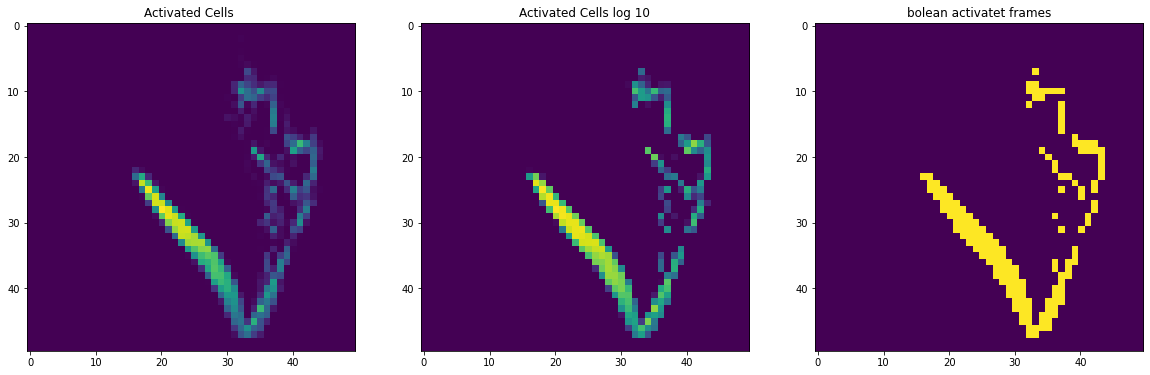

In [10]:
# cv2.imshow('Flower',img)
# cv2.imshow('Gray-Green Flower',gray_green_img)
# cv2.imshow('Gridded Flower',grid_image)
# cv2.imshow('Activated cells',activation_grid_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(10, 10))
# plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Flower')
plt.show()

# plt.subplot(2,2,2)
plt.figure(figsize=(10, 10))
plt.imshow(gray_green_img)
plt.title('Gray-Green Flower')
plt.show()

# plt.subplot(2,2,3)
plt.figure(figsize=(10, 10))
plt.imshow(grid_image)
plt.title('Gridded Flower')
plt.show()


plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(activation_grid)
plt.title('Activated Cells ')


# plt.subplot(2, 3, 2)
# plt.imshow(np.power(activation_grid, 2))
# plt.title('Activated Cells pow 2')


# plt.subplot(2, 3, 3)
# plt.imshow(np.power(activation_grid, 3))
# plt.title('Activated Cells pow 3')


plt.subplot(1, 3, 2)

log_10 = np.log10(activation_grid)
log_10 = np.add(log_10, 1)
log_10 = np.clip(log_10, 0, None)

plt.imshow(log_10)
plt.title('Activated Cells log 10')




def bool_me(x):
    if(x < 0.3): return 0
    else: return 1

bolean = np.vectorize(bool_me)

plt.subplot(1, 3, 3)

plt.imshow(bolean(log_10))
plt.title('bolean activatet frames')

plt.show()
